In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [3]:
errors = np.random.normal(0, 1, 400)

In [4]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [5]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [6]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

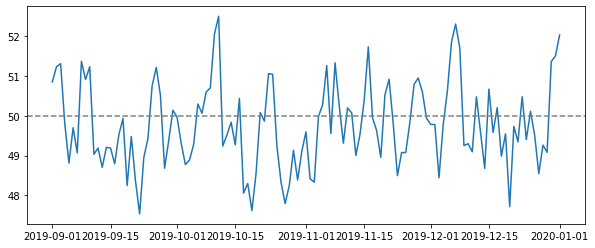

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [8]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]
#This is a Python function that calculates the Pearson correlation coefficient between a time series and its lagged version, given a lag value. 

<BarContainer object of 10 artists>

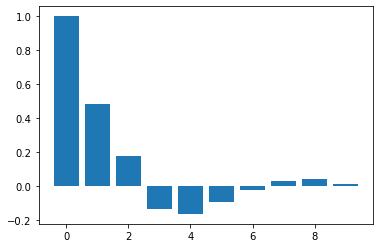

In [9]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

C:\Users\KISHOLOY\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


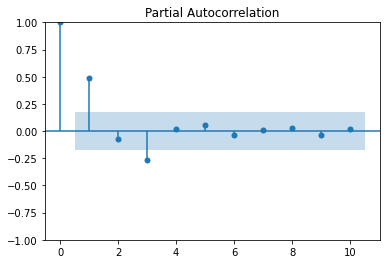

In [10]:
#pacf_vals = pacf(series)
#num_lags = 25
plot_pacf(series, lags=10)
plt.show()

In [12]:
#Order being 2 for us in the MA process, we can only predict that many periods in the future, after that it will predict constant mean 
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [15]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [16]:
#fit the model
model_fit = model.fit()

In [17]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -158.559
Date:                Wed, 10 May 2023   AIC                            325.119
Time:                        02:11:18   BIC                            336.302
Sample:                    09-01-2019   HQIC                           329.661
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7500      0.157    316.931      0.000      49.442      50.058
ma.L1          0.4971      0.097      5.108      0.000       0.306       0.688
ma.L2          0.3600      0.083      4.345      0.0

#Predicted Model:

## y' = 50 + 0.49*Et-1  + 0.3*Et-2

##Whereas actual was y = 50 + 0.4Et-1 + 0.3Et-2

In [18]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [19]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [20]:
test_end

datetime.datetime(2020, 1, 1, 0, 0)

In [21]:
pred_end_date

Timestamp('2020-01-01 00:00:00', freq='D')

In [22]:
residuals = test_data - predictions

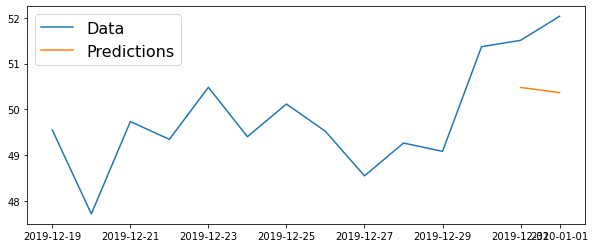

In [23]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [24]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0261


In [25]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.3878660390410507
